# COTTON DISEASE PREDICTION 

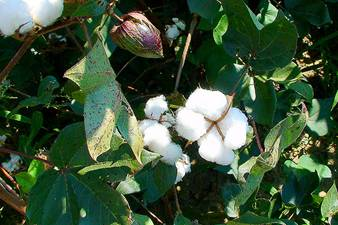

In this dataset we are provided with images that belong to 4 classes : diseased leaf , diseased plant , fresh leaf and fresh plant. The objective of this study is to create a CNN model to help us predict whether these image of the leaf/plant belong to the diseased category or the healthy category. Working with images is pretty memory consuming, especially if you read and preprocess all of them at the same time. The following approach avoids this problem in Keras, leaving more space in memory to use augmentation and/or loading pre-trained models. I have tried my best to comment all the important steps but if any step is not well explained, I request the kagglers to ask the doubts or make suggestions on the comments. Happy learning :-)

In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## 1. Importing libraries & preprocessing

In [ ]:
# Computational libraries
import numpy as np
import pandas as pd

# Imporitng Data Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

#import miscellaneous libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width', None)

#Importing Warning Libraries
import warnings
warnings.filterwarnings("ignore")

# Importing Data Preparation and Modeling Libraries
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import *

# Convolutional Neural Network

# Importing the tensorflow  libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import *
from tensorflow.keras.layers import (
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    MaxPool2D
)
from tensorflow.keras.preprocessing import image

In [ ]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set

train_datagen = ImageDataGenerator(rescale = 1.0/255, shear_range = 0.2, zoom_range = 0.2,
                                  horizontal_flip = True,vertical_flip = True,
                                  rotation_range=20,width_shift_range=0.2,
                                height_shift_range=0.2)

train_df = train_datagen.flow_from_directory('/kaggle/input/cotton-disease-dataset/Cotton Disease/train',
                                            target_size = (128,128), batch_size = 32, class_mode= 'categorical',
                                            seed=42,shuffle=True)


In [ ]:
# Preprocessing the validation set
valid_datagen = ImageDataGenerator(rescale = 1.0/255)

valid_df = valid_datagen.flow_from_directory('/kaggle/input/cotton-disease-dataset/Cotton Disease/val',
                                            target_size = (128, 128), batch_size = 32,
                                            class_mode = 'categorical',seed=42,shuffle=True)

In [ ]:
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1.0/255)

test_df = test_datagen.flow_from_directory('/kaggle/input/cotton-disease-dataset/Cotton Disease/test',
                                            target_size = (128,128), batch_size = 32,
                                            class_mode = 'categorical',seed=42,shuffle=False)

## 2. Building CNN

In [ ]:
# Part 2 -  Building the CNN

# Initialising the CNN
cnn = Sequential()

# Step 1 - Convolution
cnn.add(Conv2D(filters = 32, padding = 'same', kernel_size=3, activation='relu',
                              input_shape=[128, 128, 3]))

# Step 2 - Pooling
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Dropout(rate=0.25))

# Adding a second convolutional layer
cnn.add(Conv2D(filters = 32, padding='same', kernel_size=3, activation='relu'))
cnn.add(Conv2D(filters = 64, padding='same', kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Dropout(rate=0.25))

# Step 3 - Flattening
cnn.add(Flatten())

# Step 4 - Full Connection
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=128, activation='relu'))

cnn.add(Dropout(rate=0.25))

# Step 5 - Output layer
cnn.add(Dense(units=4, activation='softmax'))

In [ ]:
cnn.summary()

In [ ]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])



In [ ]:
# Training the CNN on the Training set & evaluating it on the validation set
# cnn.fit(x = train_df, validation_data = valid_df, epochs = 10)
history = cnn.fit(train_df, validation_data = valid_df, epochs = 20)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## 3. Making predictions

In [ ]:
cnn.evaluate(valid_df)

### Let us make predictions on some random images

3.1 Importing new images using load_img object for classification, Importing image of fresh cotton plant

In [ ]:
# test_image = image.load_img('/kaggle/input/cotton-disease-dataset/Cotton Disease/test/fresh cotton plant/dsd (223).jpg', target_size = (128, 128))
# test_image


pred = ["diseased cotton leaf","diseased cotton plant","fresh cotton leaf","fresh cotton plant"]
test_image = image.load_img('/kaggle/input/cotton-disease-dataset/Cotton Disease/test/fresh cotton plant/dsd (223).jpg', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
pred[result.argmax()]

3.2 Importing new images using load_img object for classification, Importing image of fresh cotton leaf


In [ ]:
# test_image = image.load_img('/kaggle/input/cotton-disease-dataset/Cotton Disease/test/fresh cotton leaf/d (133)_iaip.jpg', target_size = (128, 128))
# test_image

pred = ["diseased cotton leaf","diseased cotton plant","fresh cotton leaf","fresh cotton plant"]
test_image = image.load_img('/kaggle/input/cotton-disease-dataset/Cotton Disease/test/fresh cotton leaf/d (133)_iaip.jpg', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
pred[result.argmax()]

3.3 Importing new images using load_img object for classification, Importing image of diseased cotton plant


In [ ]:
# test_image = image.load_img('/kaggle/input/cotton-disease-dataset/Cotton Disease/test/diseased cotton plant/dd (885)_iaip.jpg', target_size = (128,128))
# test_image

pred = ["diseased cotton leaf","diseased cotton plant","fresh cotton leaf","fresh cotton plant"]
test_image = image.load_img('/kaggle/input/cotton-disease-dataset/Cotton Disease/test/diseased cotton plant/dd (885)_iaip.jpg', target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
pred[result.argmax()]

3.4 Importing new images using load_img object for classification, Importing image of diseased cotton leaf


In [ ]:
# test_image = image.load_img('/kaggle/input/cotton-disease-dataset/Cotton Disease/test/diseased cotton leaf/dis_leaf (153)_iaip.jpg', target_size = (128, 128))
# test_image

pred = ["diseased cotton leaf","diseased cotton plant","fresh cotton leaf","fresh cotton plant"]
test_image = image.load_img('/kaggle/input/cotton-disease-dataset/Cotton Disease/test/diseased cotton leaf/dis_leaf (153)_iaip.jpg', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
pred[result.argmax()]

### Let us save predictions to a new file

In [ ]:
test_df.reset()
pred=cnn.predict(test_df,verbose=1)

In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)

In [ ]:
labels = (train_df.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [ ]:
filenames=test_df.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

#### If you are unable to download the output file using above method, then follow the below method

In [ ]:

# Change your kernel's working directory(it's very important to change the working directory as you will not have write access to other directories) 
# Change it to 'kaggle/working' using the below command
import os
os.chdir(r'/kaggle/working')

In [ ]:
results.to_csv(r'results.csv',index=False)

In [ ]:
from IPython.display import FileLink
FileLink(r'results.csv')

_________________________________

### <a>Any advice & suggestions would be appreciated!!

### <a> Happy Learning :-) 